Importing Liabraries:

In [2]:
import numpy as np
import pandas as pd
import os

import xgboost

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.utils import to_categorical


Importing datasets:

In [3]:
data = pd.read_csv("dataset/data.csv")
data

C:\Users\ankit\AppData\Local\Temp\ipykernel_12892\3782808368.py:1: DtypeWarning: Columns (11,12,89,98,109) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset/data.csv")


,Y,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X103,X104,X105,X106,X107,X108,X109,X110,X111,Unnamed: 111
0,0,EI,A,GA16,Z90,63670190,V99912,21800.0,GA16,2/28/2019 3:22,...,55.58,41.0,1.35,66.0,850.0,21.57,2022.0,70.0,-15.0,NaN
1,0,EI,A,MS02,Z90,63660171,V99932,21620.0,MS02,2/28/2019 2:28,...,57.70,43.0,1.33,66.0,850.0,21.40,1925.0,66.0,-20.0,NaN
2,0,EI,A,MS01,Z90,63580151,V99832,21910.0,MS01,2/28/2019 2:57,...,54.63,42.0,1.30,56.0,850.0,21.12,1656.0,72.0,-1.0,NaN
3,0,EI,A,GA16,Z90,63650291,V99916,21560.0,GA16,2/28/2019 2:59,...,55.46,41.0,1.35,49.0,850.0,21.33,1489.0,59.0,-20.0,NaN
4,0,EI,A,GA16,Z90,63650301,V99897,21510.0,GA16,2/28/2019 2:34,...,54.62,41.0,1.33,49.0,850.0,21.26,1480.0,63.0,-14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25713,0,EI,A,GAF3,Z60,K045740101,A232148,23400.0,GAF3,2/27/2020 2:07,...,46.49,52.0,0.89,112.0,850.0,22.97,3031.0,NaN,NaN,NaN
25714,0,EI,A,GAF3,Z60,K045740130,A232148,23400.0,GAF3,2/27/2020 1:59,...,46.49,52.0,0.89,112.0,850.0,22.97,3018.0,NaN,NaN,NaN
25715,0,EI,A,GAF3,Z60,K044980101,A230922,24070.0,GAF3,2/27/2020 2:56,...,51.24,51.0,1.01,99.0,850.0,23.75,2815.0,NaN,NaN,NaN
25716,0,EI,A,GA14,Z60,79140221,V14845,23630.0,GA14,3/15/2020 14:41,...,48.61,48.0,1.01,99.0,850.0,22.77,2847.0,57.0,-1.0,NaN


Data Preprocessing:

In [3]:
data.shape

(25718, 112)

In [4]:
data.isna().sum().sum()


79934

In [5]:
data.columns

Index(['Y', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111',
       'Unnamed: 111'],
      dtype='object', length=112)

In [6]:
data['Y'].value_counts()

0    25384
1      334
Name: Y, dtype: int64

In [7]:
print("Persentage of Y: \n")
data['Y'].value_counts()/len(data['Y'])*100

Persentage of Y: 



0    98.701299
1     1.298701
Name: Y, dtype: float64

In [8]:
# Given value counts for y
value_counts_y = {'0': 25384, '1': 334}  # Replace with your actual value counts

# Extract counts for each class
count_class_0 = value_counts_y['0']
count_class_1 = value_counts_y['1']

# Calculate the imbalance ratio
imbalance_ratio = count_class_1 / count_class_0
print("Imbalance ratio for Y:", imbalance_ratio)


Imbalance ratio for Y: 0.013157894736842105


In [9]:
data.describe()

,Y,X8,X14,X15,X16,X17,X18,X19,X20,X21,...,X102,X103,X104,X105,X106,X107,X108,X109,X111,Unnamed: 111
count,25718.000000,16749.000000,24031.000000,24031.000000,24031.000000,24031.000000,25717.000000,25717.000000,25676.000000,25717.000000,...,16898.000000,25618.000000,25717.000000,25676.000000,25717.000000,25717.000000,25536.000000,25717.000000,21099.000000,146.000000
mean,0.012987,23847.007762,4.456650,6.533006,8.409460,11.471132,1.000726,1277.485632,100.199330,19.594237,...,101.597239,55.756477,54.504638,1.407579,101.077595,785.999844,23.184102,2670.035290,-8.358406,-10.773973
std,0.113220,2300.886551,1.200804,1.026158,1.068786,0.775478,0.399129,121.776679,27.702281,101.206904,...,53.389565,14.678799,9.759614,4.738860,32.518569,81.359187,2.215693,1023.158162,623.163392,24.127183
min,0.000000,7932.000000,0.000000,0.000000,0.000000,0.000000,0.420000,1000.000000,24.000000,2.000000,...,-83.000000,12.810000,31.750000,0.250000,0.660000,45.000000,6.380000,15.490000,-5828.000000,-55.000000
25%,0.000000,22520.000000,3.650000,5.840000,7.850000,10.950000,0.700000,1220.000000,81.000000,10.000000,...,98.000000,45.480000,47.000000,0.910000,75.000000,730.000000,22.290000,1879.000000,-36.000000,-27.000000
50%,0.000000,23900.000000,4.560000,6.570000,8.400000,11.320000,0.850000,1250.000000,97.000000,14.000000,...,100.000000,54.260000,52.000000,1.030000,99.000000,830.000000,23.130000,2644.000000,-18.000000,-14.000000
75%,0.000000,25320.000000,5.110000,7.300000,9.130000,12.040000,1.200000,1365.000000,120.000000,23.000000,...,100.000000,67.710000,66.000000,1.140000,131.000000,850.000000,24.600000,3368.000000,0.000000,2.000000
max,1.000000,29000.000000,40.020000,10.040000,11.320000,13.690000,2.038000,1535.000000,150.000000,9860.000000,...,720.000000,100.000000,84.780000,66.000000,150.000000,850.000000,27.970000,6104.000000,6005.000000,57.000000


Text(0.5, 1.0, 'Count of the Y')

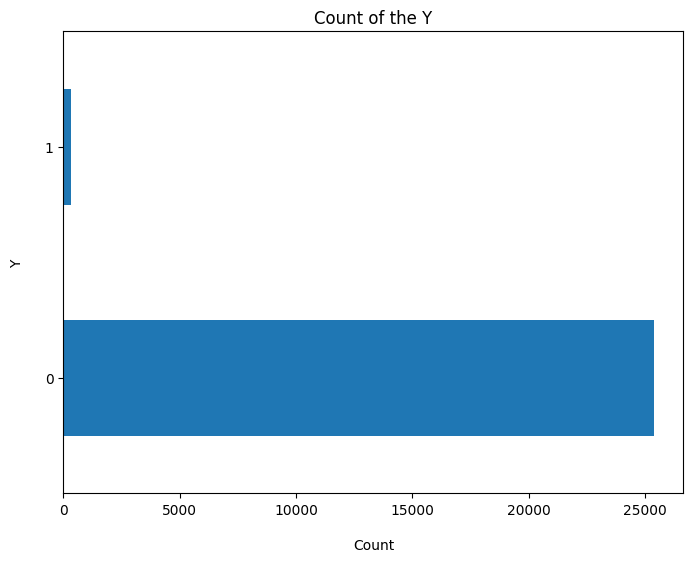

In [10]:
data['Y'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=15)
plt.ylabel("Y", labelpad=15)
plt.title("Count of the Y")

<b><li>List of columns with more than 50% missing values

In [11]:
def columns_with_missing_data(df):
    missing_data_threshold = len(df) * 0.5  # 50% threshold
    missing_columns = []
    for column in df.columns:
        if df[column].isnull().sum() > missing_data_threshold:
            missing_columns.append(column)
    return missing_columns

missing_columns = columns_with_missing_data(data)
print("Columns with more than 50% missing values:")
print(missing_columns)

Columns with more than 50% missing values:
['Unnamed: 111']


Droping the columns with missing data greater than 50%

In [12]:
data.drop(columns=missing_columns,inplace=True)

Handling the Categorical data:

In [13]:
categoriacal_cols = []
for cols in data.columns:
    if(data[cols].dtype == 'object'):
        categoriacal_cols.append(cols)
print(categoriacal_cols)
print(len(categoriacal_cols))

['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11', 'X12', 'X13', 'X90', 'X99', 'X110']
14


In [14]:
#Unique Values in each categorical columns in the dataset
unique_counts = data[categoriacal_cols].nunique()
print("Number of unique values in each categorical column:")
print(unique_counts)

Number of unique values in each categorical column:
X2          6
X3          2
X4         91
X5         11
X6      16499
X7       4343
X9        212
X10     16612
X11     25717
X12       114
X13       134
X90      4653
X99       778
X110      878
dtype: int64


<b>Given the number of unique values in each categorical column Here are the algorithms we are using for encoding them:</b>

<ol>
<li>label_columns = ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11']
<li>frequency_columns = ['X12', 'X13', 'X90', 'X99', 'X110']
</ol>

In [15]:
# Define categorical columns for each approach
label_columns = ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11']
frequency_columns = ['X12', 'X13', 'X90', 'X99', 'X110']

# Label Encoding
label_encoded_data = data[label_columns].copy()
for col in label_columns:
    le = LabelEncoder()
    label_encoded_data[col] = le.fit_transform(label_encoded_data[col])

# Frequency Encoding
frequency_encoded_data = data[frequency_columns].copy()
for col in frequency_columns:
    frequency_encoded_data[col] = data[col].map(data[col].value_counts(normalize=True))

# Combine the encoded data with the remaining data from the original dataset
encoded_data = pd.concat([data.drop(columns=label_columns + frequency_columns),label_encoded_data, frequency_encoded_data], axis=1)

In [16]:
encoded_data.head()

,Y,X8,X14,X15,X16,X17,X18,X19,X20,X21,...,X6,X7,X9,X10,X11,X12,X13,X90,X99,X110
0,0,21800.0,NaN,NaN,NaN,NaN,1.2,1105.0,89.0,22.0,...,261,4334,149,5749,9195,NaN,NaN,0.000507,0.004985,0.017442
1,0,21620.0,NaN,NaN,NaN,NaN,1.2,1160.0,88.0,23.0,...,255,4341,209,5738,9196,NaN,NaN,0.000351,0.004985,0.015536
2,0,21910.0,NaN,NaN,NaN,NaN,1.4,1135.0,73.0,23.0,...,186,4325,208,5744,9221,NaN,NaN,0.000273,0.008664,0.014487
3,0,21560.0,NaN,NaN,NaN,NaN,1.6,1115.0,66.0,22.0,...,243,4335,149,5745,9222,NaN,NaN,0.000234,0.003264,0.013391
4,0,21510.0,NaN,NaN,NaN,NaN,1.6,1115.0,65.0,22.0,...,244,4330,149,5739,9223,NaN,NaN,0.000195,0.003264,0.016203


In [17]:

# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the imputer on the encoded data
imputed_data = imputer.fit_transform(encoded_data)

# Convert the imputed data back to a DataFrame
imputed_encoded_data = pd.DataFrame(imputed_data, columns=encoded_data.columns)

print(imputed_encoded_data.head())

     Y       X8       X14       X15       X16        X17  X18     X19   X20  \
0  0.0  21800.0  4.697935  6.112189  8.198628  11.820297  1.2  1105.0  89.0   
1  0.0  21620.0  4.673502  6.029752  8.132146  11.792031  1.2  1160.0  88.0   
2  0.0  21910.0  4.566613  5.816809  7.979106  11.747175  1.4  1135.0  73.0   
3  0.0  21560.0  4.652251  5.958843  8.097748  11.801473  1.6  1115.0  66.0   
4  0.0  21510.0  4.596386  5.947676  8.125361  11.797278  1.6  1115.0  65.0   

    X21  ...     X6      X7     X9     X10     X11       X12       X13  \
0  22.0  ...  261.0  4334.0  149.0  5749.0  9195.0  0.041259  0.033963   
1  23.0  ...  255.0  4341.0  209.0  5738.0  9196.0  0.038728  0.035051   
2  23.0  ...  186.0  4325.0  208.0  5744.0  9221.0  0.031911  0.034776   
3  22.0  ...  243.0  4335.0  149.0  5745.0  9222.0  0.043007  0.036571   
4  22.0  ...  244.0  4330.0  149.0  5739.0  9223.0  0.040466  0.035445   

        X90       X99      X110  
0  0.000507  0.004985  0.017442  
1  0.000351 

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [18]:
imputed_encoded_data.head()

,Y,X8,X14,X15,X16,X17,X18,X19,X20,X21,...,X6,X7,X9,X10,X11,X12,X13,X90,X99,X110
0,0.0,21800.0,4.697935,6.112189,8.198628,11.820297,1.2,1105.0,89.0,22.0,...,261.0,4334.0,149.0,5749.0,9195.0,0.041259,0.033963,0.000507,0.004985,0.017442
1,0.0,21620.0,4.673502,6.029752,8.132146,11.792031,1.2,1160.0,88.0,23.0,...,255.0,4341.0,209.0,5738.0,9196.0,0.038728,0.035051,0.000351,0.004985,0.015536
2,0.0,21910.0,4.566613,5.816809,7.979106,11.747175,1.4,1135.0,73.0,23.0,...,186.0,4325.0,208.0,5744.0,9221.0,0.031911,0.034776,0.000273,0.008664,0.014487
3,0.0,21560.0,4.652251,5.958843,8.097748,11.801473,1.6,1115.0,66.0,22.0,...,243.0,4335.0,149.0,5745.0,9222.0,0.043007,0.036571,0.000234,0.003264,0.013391
4,0.0,21510.0,4.596386,5.947676,8.125361,11.797278,1.6,1115.0,65.0,22.0,...,244.0,4330.0,149.0,5739.0,9223.0,0.040466,0.035445,0.000195,0.003264,0.016203


In [19]:
# Save the imputed data to a CSV file
imputed_encoded_data.to_csv('imputed_encoded_data.csv', index=False)

In [20]:
from imblearn.over_sampling import SMOTE, ADASYN

# Assuming 'imputed_encoded_data' is your imputed encoded DataFrame

# Extract features (X) and target variable (y)
X = imputed_encoded_data.drop(columns=['Y'])  
y = imputed_encoded_data['Y']  

# Apply SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply ADASYN
adasyn = ADASYN(random_state=0)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Display the shape of the resampled data
print("Shape of SMOTE-resampled data:", X_smote.shape, y_smote.shape)
print("Shape of ADASYN-resampled data:", X_adasyn.shape, y_adasyn.shape)


Shape of SMOTE-resampled data: (50768, 110) (50768,)
Shape of ADASYN-resampled data: (50777, 110) (50777,)


In [21]:
y_smote.value_counts()

0.0    25384
1.0    25384
Name: Y, dtype: int64

# Model Training :

In [22]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
linear_reg_pred = np.round(linear_reg_model.predict(X_test_scaled)).astype(int)
linear_reg_accuracy = accuracy_score(y_test, linear_reg_pred)
print("Linear Regression Accuracy:", linear_reg_accuracy)


Linear Regression Accuracy: 0.8167224739019106


In [25]:
# Logistic Regression
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_scaled, y_train)
logistic_reg_pred = logistic_reg_model.predict(X_test_scaled)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)

Logistic Regression Accuracy: 0.8175103407524128


c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
# SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9821745125073863


In [27]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_scaled, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test_scaled)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

Gradient Boosting Accuracy: 0.9834547961394524


In [28]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
random_forest_pred = random_forest_model.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 0.9980303328737443


In [29]:

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)
adaboost_pred = adaboost_model.predict(X_test_scaled)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.9408115028560173


In [34]:

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_pred = decision_tree_model.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.9840456962773292


In [37]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(40614, 110)
(10154, 110)


In [41]:
# Deep Neural Network (DNN)
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

dnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

_, dnn_accuracy = dnn_model.evaluate(X_test_scaled, y_test)

Epoch 1/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.2518 - accuracy: 0.9026 - val_loss: 0.1194 - val_accuracy: 0.9577
Epoch 2/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.0899 - accuracy: 0.9740 - val_loss: 0.0698 - val_accuracy: 0.9808
Epoch 3/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0506 - val_accuracy: 0.9851
Epoch 4/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.0508 - val_accuracy: 0.9860
Epoch 5/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.0332 - val_accuracy: 0.9905
Epoch 6/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.0285 - val_accuracy: 0.9915
Epoch 7/10
1270/1270 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0398 - val_accuracy:

In [44]:
from sklearn.metrics import precision_score, confusion_matrix

dnn_predictions = (dnn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Precision score for CNN and DNN models

dnn_precision = precision_score(y_test, dnn_predictions )

# Confusion matrix for CNN and DNN models

dnn_cm = confusion_matrix(y_test, dnn_predictions)



318/318 [==============================] - 0s 812us/step


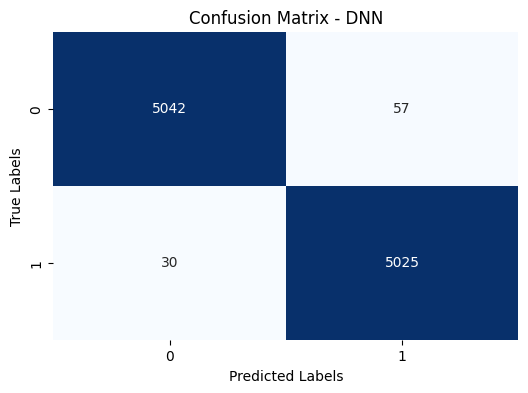

In [45]:
# Plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)


plot_confusion_matrix(dnn_cm, 'Confusion Matrix - DNN')
plt.show()

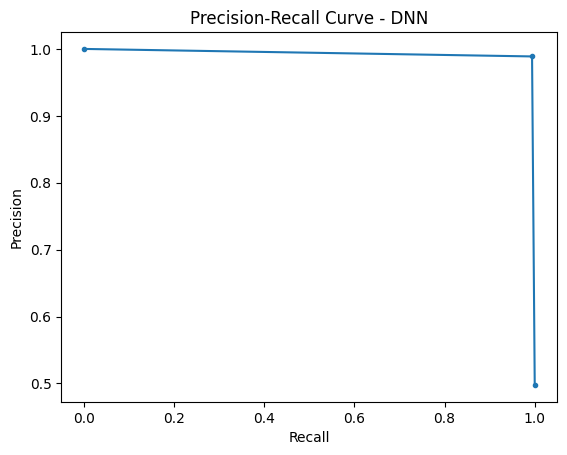

In [46]:
from sklearn.metrics import precision_recall_curve
# Plot precision vs. recall curve
def plot_precision_recall(y_true, y_pred, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)


plot_precision_recall(y_test, dnn_predictions, 'Precision-Recall Curve - DNN')
plt.show()

In [47]:

# Calculate Recall-Imbalance (RI)
def recall_imbalance(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp / (tp + fn)

dnn_ri = recall_imbalance(dnn_cm)

print("DNN Accuracy:", dnn_accuracy)
print("DNN Precision Score:", dnn_precision)
print("DNN Recall-Imbalance (RI):", dnn_ri)

DNN Accuracy: 0.9914319515228271
DNN Precision Score: 0.9887839433293979
DNN Recall-Imbalance (RI): 0.9940652818991098


In [48]:
# Model names
models = ['Linear Regression', 'Logistic Regression', 'SVM', 'Gradient Boosting', 
          'Random Forest', 'AdaBoost', 'Decision Tree', 'DNN']

# Accuracy scores for all models
accuracies = [linear_reg_accuracy, logistic_reg_accuracy, svm_accuracy,
              gradient_boosting_accuracy, random_forest_accuracy, 
              adaboost_accuracy, decision_tree_accuracy, dnn_accuracy]


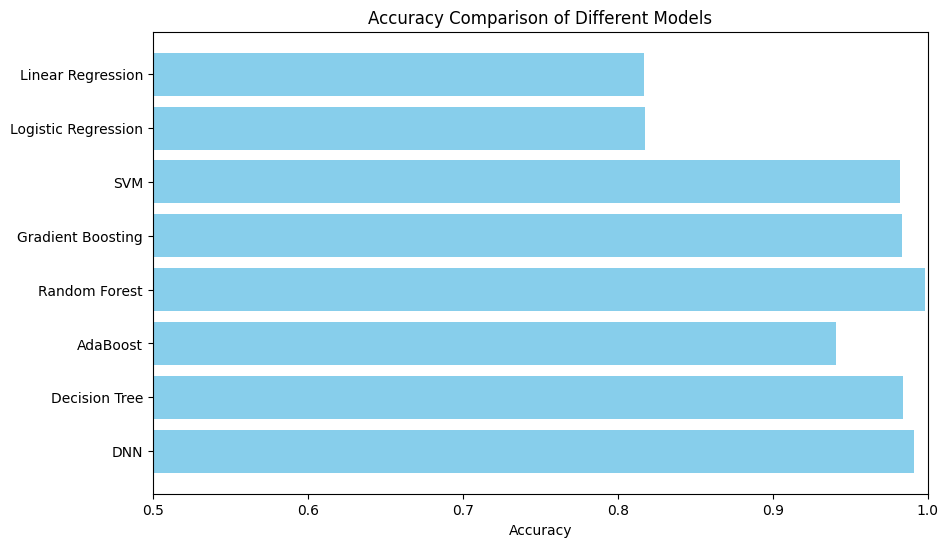

In [49]:
# Create bar plot for accuracy scores
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0.5, 1.0)
plt.gca().invert_yaxis()
plt.show()

In [50]:

# Compare accuracy scores and rate models
accuracy_dict = dict(zip(models, accuracies))
sorted_accuracy_dict = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True)

print("Accuracy Scores:")
for model, accuracy in sorted_accuracy_dict:
    print(f"{model}: {accuracy}")

print("\nRanking based on accuracy:")
for i, (model, accuracy) in enumerate(sorted_accuracy_dict, start=1):
    print(f"{i}. {model}: {accuracy}")

Accuracy Scores:
Random Forest: 0.9980303328737443
DNN: 0.9914319515228271
Decision Tree: 0.9840456962773292
Gradient Boosting: 0.9834547961394524
SVM: 0.9821745125073863
AdaBoost: 0.9408115028560173
Logistic Regression: 0.8175103407524128
Linear Regression: 0.8167224739019106

Ranking based on accuracy:
1. Random Forest: 0.9980303328737443
2. DNN: 0.9914319515228271
3. Decision Tree: 0.9840456962773292
4. Gradient Boosting: 0.9834547961394524
5. SVM: 0.9821745125073863
6. AdaBoost: 0.9408115028560173
7. Logistic Regression: 0.8175103407524128
8. Linear Regression: 0.8167224739019106


In [53]:
from sklearn.metrics import precision_score, f1_score, recall_score, classification_report

# Define the models and their predictions
models = ['Random Forest', 'DNN', 'Decision Tree', 'Gradient Boosting', 'SVM', 'AdaBoost']
predictions = [random_forest_pred, dnn_predictions, decision_tree_pred, gradient_boosting_pred, svm_pred, adaboost_pred]

# Calculate precision, F1 score, recall, and imbalance for each model
for model, pred in zip(models, predictions):
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    recall = recall_score(y_test, pred)
    imbalance = np.sum(y_test == 1) / np.sum(y_test == 0)
    
    print(f"Model: {model}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Imbalance Ratio: {imbalance}\n")

    # Print classification report
    print(f"Classification Report for {model}:")
    print(classification_report(y_test, pred, target_names=['Class 0', 'Class 1']))
    print("\n")


Model: Random Forest
Precision: 0.998613586848881
F1 Score: 0.9980205859065717
Recall: 0.9974282888229475
Imbalance Ratio: 0.9913708570307903

Classification Report for Random Forest:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      5099
     Class 1       1.00      1.00      1.00      5055

    accuracy                           1.00     10154
   macro avg       1.00      1.00      1.00     10154
weighted avg       1.00      1.00      1.00     10154



Model: DNN
Precision: 0.9887839433293979
F1 Score: 0.9914175791654336
Recall: 0.9940652818991098
Imbalance Ratio: 0.9913708570307903

Classification Report for DNN:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      5099
     Class 1       0.99      0.99      0.99      5055

    accuracy                           0.99     10154
   macro avg       0.99      0.99      0.99     10154
weighted avg       0.99      0.99      0.99     10

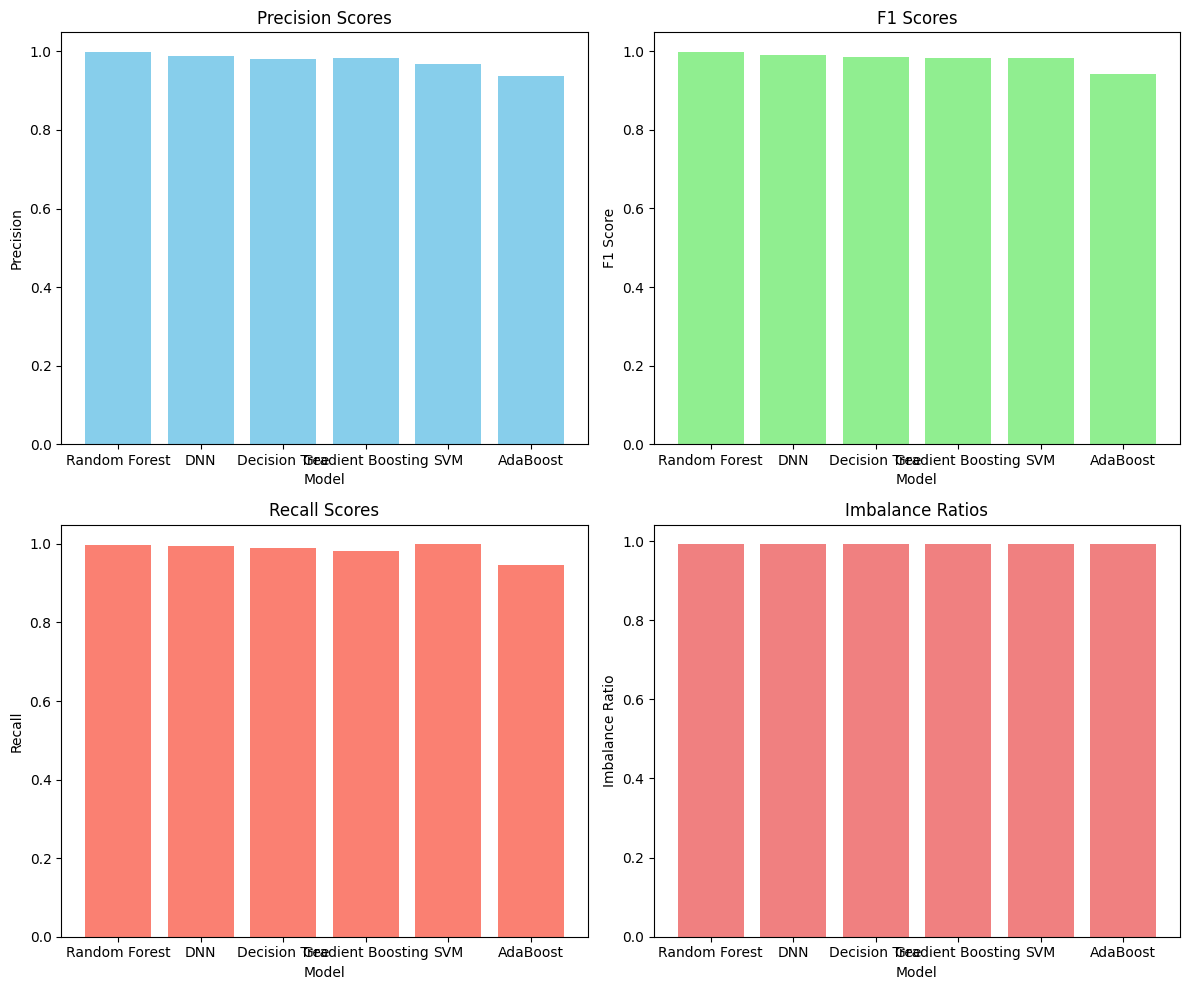

In [56]:
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Random Forest', 'DNN', 'Decision Tree', 'Gradient Boosting', 'SVM', 'AdaBoost']
precision_scores = [precision_score(y_test, pred) for pred in [random_forest_pred, dnn_predictions, decision_tree_pred, gradient_boosting_pred, svm_pred, adaboost_pred]]
f1_scores = [f1_score(y_test, pred) for pred in [random_forest_pred, dnn_predictions, decision_tree_pred, gradient_boosting_pred, svm_pred, adaboost_pred]]
recall_scores = [recall_score(y_test, pred) for pred in [random_forest_pred, dnn_predictions, decision_tree_pred, gradient_boosting_pred, svm_pred, adaboost_pred]]
imbalance_ratios = [np.sum(y_test == 1) / np.sum(y_test == 0) for _ in range(len(models))]

# Create subplots for precision, F1 score, recall, and imbalance ratio
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Precision comparison
axs[0, 0].bar(models, precision_scores, color='skyblue')
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_xlabel('Model')
axs[0, 0].set_ylabel('Precision')

# F1 score comparison
axs[0, 1].bar(models, f1_scores, color='lightgreen')
axs[0, 1].set_title('F1 Scores')
axs[0, 1].set_xlabel('Model')
axs[0, 1].set_ylabel('F1 Score')

# Recall comparison
axs[1, 0].bar(models, recall_scores, color='salmon')
axs[1, 0].set_title('Recall Scores')
axs[1, 0].set_xlabel('Model')
axs[1, 0].set_ylabel('Recall')

# Imbalance ratio comparison
axs[1, 1].bar(models, imbalance_ratios, color='lightcoral')
axs[1, 1].set_title('Imbalance Ratios')
axs[1, 1].set_xlabel('Model')
axs[1, 1].set_ylabel('Imbalance Ratio')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
